# Final project Report

**Motivation and problem statement:** 

Being a student at the University of Washington, we regularly come across the email from UW-Alert regarding the crimes happening around the campus. These crimes are increasing regularly and mostly the criminals don’t get caught. Also, as since the COVID-19 started, a lot of people are having health issues, lost their jobs, have to stay at home etc. This encouraged me to look into the crime dataset in the Seattle region (2009-2020) and also understand how COVID has impacted crimes in Seattle.

In my final project for the course Human Centered Data Science (HCDS) by University of Washington, I want to understand the relationship between the COVID-19 data with the crime data. We want to identify how the trend looks for various regions, how is the relationship between crimes with different risk levels - low risk(robbery) to high risk(murder).  

This could help the law-enforcement agencies to take better measures to minimize the types of crime that are increasing in a regions. For example, assuming that people are staying at home and not going out the chances of a snaching happeing decreases whereas if the criminals are desparate enough this could lead to a higher level of crime in the regions. Exploring these relationship will help in determining the crimes and taking required preventive measures. 


Few other facts that have been reported this year - 
1. Preliminary FBI data for the first six months of 2020 shows murder and non-negligent homicide as up nearly 15% compared to the same time period last year.
2. A report by the Council on Criminal Justice (CCJ) paints an even more dire picture—showing a 53% jump in homicides in 27 major US cities this summer, compared to the last.
3. FBI data also shows a 4.6% jump in aggravated assaults between January and June 2020, versus the same period in 2019.
4. Aggravated assault rose 14% summer over summer, according to the CCJ analysis.
5. Gun violence has been relentless for much of 2020, particularly in major cities like Chicago, New York City, and Philadelphia.
6. As of September 28, the Gun Violence Archive (GVA) has recorded 13,641 homicides, murders, and unintentional gun-related deaths for 2020. That’s almost 90% of the total recorded for all of 2019.

The biggest increases have been in violent crimes, particularly murder, aggravated assault, and shooting incidents








In [238]:
## Import Libraries 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy
import dateutil
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


**Background/Related Work**  

According to National Committee of COVID and criminal justice also wrote in their impact report that though they observed a drop in burglary they observed an increased crime in assault or homocides ([link1](https://covid19.counciloncj.org/2020/09/26/impact-report-covid-19-and-crime/ ) [link2](https://covid19.counciloncj.org/2020/07/28/crime/) ). 
They have provided an aggregated information and we expect to find a similar trend in the Seattle dataset as well. 

Also, after reading the paper, we understood that the crime drop is being driven by decreases in minor offenses which are typically committed in peer groups. At the same time, serious crimes which are generally not committed with co-offenders (namely homicide and intimate partner violence) have either remained constant or increased during COVID which will be covered in our second queston i.e. explorign the COVID relationship across various crime call types .




# Datasets

**About Seattle 911 Calls dataset, COVID counts dataset:**

For the project, I am planning to use the publicly available Seattle 911 call data (can be found [here](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy) ) and Washington state COVID 19 dataset (can be found [here](https://www.doh.wa.gov/Emergencies/COVID19/DataDashboard#tables)). 

Seattle 911 Calls data represents police response activity.  Each row is a record of a Call for Service (CfS) logged with the Seattle Police Department (SPD) Communications Center. Calls originated from the community and range from in progress or active emergencies to requests for problem-solving. Additionally, officers will log calls from their observations of the field. The data is available since 2010 and contains the latest 911call information (around 4 million records), but for this analysis, I will be using data since March 2020 i.e. since we started recording COVID cases. These data are queried from the Data Analytics Platform (DAP) and updated incrementally daily. The data contains various crucial features that can help to understand the data better. The various parameters are –

* Precinct: This variable contains details regarding the location where the call was originated. The nearest Precinct to where the call originated.
* Sector: This variable contains details regarding the location where the call was originated. This is a sub-category of the Precincts variable. All Sectors roll up to one of five Precincts.
* Beat: Beat is a sub-category for sector variables. All Beats roll up to Sectors. To safeguard the privacy of our community, calls will only be located in the “beat” level. Beats are the most granular unit of management used for patrol deployment.
* Event Clearance Description: This variable revolves around how the call was resolved, as reported by the primary officer. Was the call responded with just assistance or require additional follow-ups? 
* Call Type: This variable tracks how the call was received by the Communications Center i.e. was it a 911 call or other call
* Priority: This refers to the intensity of the crime taking place - is it a serious crime or a mistake, did someone get hurt or people are safe. The priority of the call is assigned by the CAD system and would be one of the key features for the project.
* Initial Call Type: How the call was classified, initially by the Communication Center
* Final Call Type: How the call was classified, finally by the primary officer.
* Original Time Queued: Time queued in the CAD system.
* Arrived Time: Time the first officer arrived on the call

As with any data, certain conditions and qualifications apply:

1. These data are queried from the Data Analytics Platform (DAP) and updated incrementally daily. A full refresh will occur twice a year and is intended to reconcile minor changes.

2. This data set only contains records of police response. If a call is queued in the system but cleared before an officer can respond, it will not be included.

3. These data contain administrative call types. Use the “Initial” and “Final” call type to identify the calls you wish to include in your analysis.

Washington State COVID-19 data represents the weekly count of COVID cases in various county. The data is weekly updated with the information regarding the COVID positive cases found every week per County. This data would be helpful to check the trend across various regions. The file contains the following features - 
* County: This variable contains details regarding the location where the case was found. 
* WeekStartDate: The variable contains the weekly aggregated informations for a date
* NewPos_All: All the positive COVID19 cases found in the given week and in that County.
* Age - We also have some age groups information which is not currently being used but could be useful in future
* dtm_updated: The date when the latest information was updated on the database. 


Using the above datasets, we can explore the features which can help us determine the trend across the regions. I also want to create new variables like time taken by the police to reach the incident site. This variable can be calculated from 2 parameters provided in the dataset – Original time queued, arrived time. We can then look into the relationship between the crimes and COVID cases. 

We have also gathered data from other regions including Baltimore, New York. If time permits we would want to extend the analysis over a larger area and identify the high crime regions in other states and share the recommendations over the same. The datasets available from Baltimore and New YorkPolice Department are similar to the dataset available to us by Seattle. If we can replicate the same analysis over another place, we will be able to generalize our results.


In [239]:
## Loading Files
COVID_Dataset = pd.read_excel('data/PUBLIC_CDC_Event_Date_SARS.xlsx')
Crime_Dataset = pd.read_csv('data/Call_Data.csv')
## Seattle 911 calls data can also be downloaded directly from the website as it will contain the latest information on daily basis
## The COVID dataset gets updated on weekly basis

In [240]:
COVID_Dataset

,County,WeekStartDate,NewPos_All,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,Positive UnkAge,dtm_updated
0,Adams County,2020-03-08,4,0,1,1,2,0,0,2020-11-08 12:47:15.043
1,Adams County,2020-03-15,3,0,0,3,0,0,0,2020-11-08 12:47:15.043
2,Adams County,2020-03-22,12,0,4,4,4,0,0,2020-11-08 12:47:15.043
3,Adams County,2020-03-29,15,3,5,4,3,0,0,2020-11-08 12:47:15.043
4,Adams County,2020-04-05,7,0,2,4,1,0,0,2020-11-08 12:47:15.043
...,...,...,...,...,...,...,...,...,...,...
1240,Unassigned,2020-10-04,19,1,16,2,0,0,0,2020-11-08 12:47:15.043
1241,Unassigned,2020-10-11,16,0,9,6,1,0,0,2020-11-08 12:47:15.043
1242,Unassigned,2020-10-18,10,2,4,4,0,0,0,2020-11-08 12:47:15.043
1243,Unassigned,2020-10-25,10,2,3,3,1,1,0,2020-11-08 12:47:15.043


In [241]:
COVID_Dataset.describe()

,NewPos_All,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,Positive UnkAge
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,94.241767,13.898795,37.594378,26.402410,12.521285,3.784739,0.040161
std,194.678600,31.574126,82.217734,54.503528,26.200296,9.630568,0.233786
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,21.000000,3.000000,8.000000,6.000000,3.000000,0.000000,0.000000
75%,82.000000,13.000000,31.000000,22.000000,12.000000,3.000000,0.000000
max,1912.000000,323.000000,890.000000,479.000000,242.000000,131.000000,3.000000


In [242]:
COVID_Dataset.dtypes

County                     object
WeekStartDate              object
NewPos_All                  int64
Age 0-19                    int64
Age 20-39                   int64
Age 40-59                   int64
Age 60-79                   int64
Age 80+                     int64
Positive UnkAge             int64
dtm_updated        datetime64[ns]
dtype: object

In [243]:
Crime_Dataset.head()

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,2020000228992,REPORT WRITTEN (NO ARREST),911,1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--CRISIS COMPLAINT - GENERAL,08/01/2020 18:43:52 PM,Aug 01 2020 18:47:58:000PM,EAST,CHARLIE,C3
1,2018000345890,ASSISTANCE RENDERED,ONVIEW,7,DIRECTED PATROL ACTIVITY,--DIRECTED PATROL ACTIVITY,09/16/2018 00:00:27 AM,Sep 16 2018 00:00:27:000AM,SOUTHWEST,WILLIAM,W2
2,2018000365220,REPORT WRITTEN (NO ARREST),911,1,MVC - WITH INJURIES (INCLUDES HIT AND RUN),--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,09/29/2018 20:32:05 PM,Sep 29 2018 20:35:10:000PM,SOUTH,SAM,S2
3,2019000134028,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",3,PARKING VIOLATION (EXCEPT ABANDONED CAR),--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),04/16/2019 05:58:47 AM,Apr 16 2019 07:41:46:000AM,NORTH,UNION,U1
4,2018000448924,REPORT WRITTEN (NO ARREST),911,3,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",12/01/2018 20:51:39 PM,Dec 01 2018 21:16:29:000PM,NORTH,JOHN,J2


In [244]:
Crime_Dataset.describe()

,CAD Event Number,Priority
count,4.480768e+06,4.480768e+06
mean,2.014705e+12,3.833790e+00
std,3.265274e+09,2.331360e+00
min,2.009000e+12,-1.000000e+00
25%,2.012000e+12,2.000000e+00
50%,2.015000e+12,3.000000e+00
75%,2.018000e+12,7.000000e+00
max,2.020000e+12,9.000000e+00


In [245]:
Crime_Dataset.dtypes


CAD Event Number                int64
Event Clearance Description    object
Call Type                      object
Priority                        int64
Initial Call Type              object
Final Call Type                object
Original Time Queued           object
Arrived Time                   object
Precinct                       object
Sector                         object
Beat                           object
dtype: object

**Unknowns and dependencies:**

I am using the datasets that are regularly updated by the government - Seattle police department and Washington Health Department. My analysis is totally dependent on the data that is available on the sources mentioned. In case, there was any issue on their end while uploading the correct dataset, it could lead to wrong results.

There are multiple dependencies which I have not yet considered that includes - any lockdowns or restrictions on the regions, the impact on Black Lives Matter movement(BLM) when people came out to support the cause. 

I will be able to complete the investigation in the given period of time/ before the project deadline given the dataset I am using.

**Research questions and/or hypotheses** 

Research question: 
I want to find the relationship between the COVID cases being captured in Seattle to the crime cases in Seattle. I also want to look into the trends before and after COVID.

Another question I want to explore is the trend for different crimedata call types.  

Hypothesis: 
Our hypothesis is that the COVID cases should decrease since the COVID as people are staying inside home.
We also expect to see an increase in crimes happening inside a household -  ranging from assault to murder. 



# Methodology

In the project, we plan to go step-by-step from understanding the dataset to finding insight and stating conclusions. 
In order to understand the data better and find any trends/insights, I will initially be doing an exploratory data analysis. This will help to get a better understanding of the variables that are available in the dataset and also to find any changes in trends.
In the next step, I want to run a t-test to check if the drop in crime is significantly different in Seattle for the year 2020.  This will help to understand the change from the expected trend due to COVID. Post understanding the impact of COVID, I also want to find the relationship between the COVID dataset (the number of cases being registered) and the 911 calls datasets(crime dataset) and observe the trend in Seattle- whether it is similar or changed? I will also look across various call types(various risk levels like burgarly, robbery, murder). Is it significantly different from each other? 

**Data Cleaning and filtering**

In [246]:
COVID_Dataset.County.value_counts()

Snohomish County       42
King County            40
Pierce County          39
Yakima County          39
Kitsap County          38
Spokane County         38
Skagit County          38
Whatcom County         38
Franklin County        38
Grant County           38
Clark County           37
Thurston County        37
Cowlitz County         37
Benton County          37
Chelan County          36
Mason County           36
Douglas County         36
Kittitas County        36
Island County          36
Walla Walla County     35
Okanogan County        35
Adams County           35
Grays Harbor County    34
Lewis County           33
Klickitat County       33
Clallam County         33
Stevens County         31
Whitman County         31
Asotin County          27
Jefferson County       26
Pacific County         25
Unassigned             25
Pend Oreille County    23
Lincoln County         19
Skamania County        18
San Juan County        17
Ferry County           16
Columbia County        12
Garfield Cou

As we are only lookinh at Seattle, King County dataset we will remove the remaining county information

In [247]:
COVID_Dataset_King = COVID_Dataset[COVID_Dataset.County=='King County']

In [248]:
## Converting the field to datetime
COVID_Dataset_King['Week']= pd.to_datetime(COVID_Dataset_King['WeekStartDate'])
COVID_Dataset_King['month'] = COVID_Dataset_King['Week'].apply(lambda x: str(x.month))
COVID_Dataset_King['month'] = pd.to_numeric(COVID_Dataset_King['month'])


C:\Users\bajaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bajaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bajaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [249]:
COVID_Dataset_King.dtypes

County                     object
WeekStartDate              object
NewPos_All                  int64
Age 0-19                    int64
Age 20-39                   int64
Age 40-59                   int64
Age 60-79                   int64
Age 80+                     int64
Positive UnkAge             int64
dtm_updated        datetime64[ns]
Week               datetime64[ns]
month                       int64
dtype: object

In [250]:
Crime_Dataset['Date'] =pd.to_datetime(Crime_Dataset['Original Time Queued'].str[:10], format='%mm/%dd/%YYYY', errors='ignore')
Crime_Dataset['Date'] =pd.to_datetime(Crime_Dataset['Date'])
Crime_Dataset['year-month'] = Crime_Dataset['Date'].apply(lambda x: str(x.year) + ' ' + str(x.month))
Crime_Dataset['year'] = Crime_Dataset['Date'].apply(lambda x: str(x.year))
Crime_Dataset['year'] = pd.to_numeric(Crime_Dataset['year'])
Crime_Dataset['month'] = Crime_Dataset['Date'].apply(lambda x: str(x.month))
Crime_Dataset['month'] = pd.to_numeric(Crime_Dataset['month'])
Crime_Dataset['year-month'] =pd.to_datetime(Crime_Dataset['year-month'])

In [251]:
Crime_Dataset_2020 = Crime_Dataset[Crime_Dataset.Date>'2020/01/01']

In [252]:
Crime_Dataset_2020.dtypes

CAD Event Number                        int64
Event Clearance Description            object
Call Type                              object
Priority                                int64
Initial Call Type                      object
Final Call Type                        object
Original Time Queued                   object
Arrived Time                           object
Precinct                               object
Sector                                 object
Beat                                   object
Date                           datetime64[ns]
year-month                     datetime64[ns]
year                                    int64
month                                   int64
dtype: object

***Exploratory data analysis***

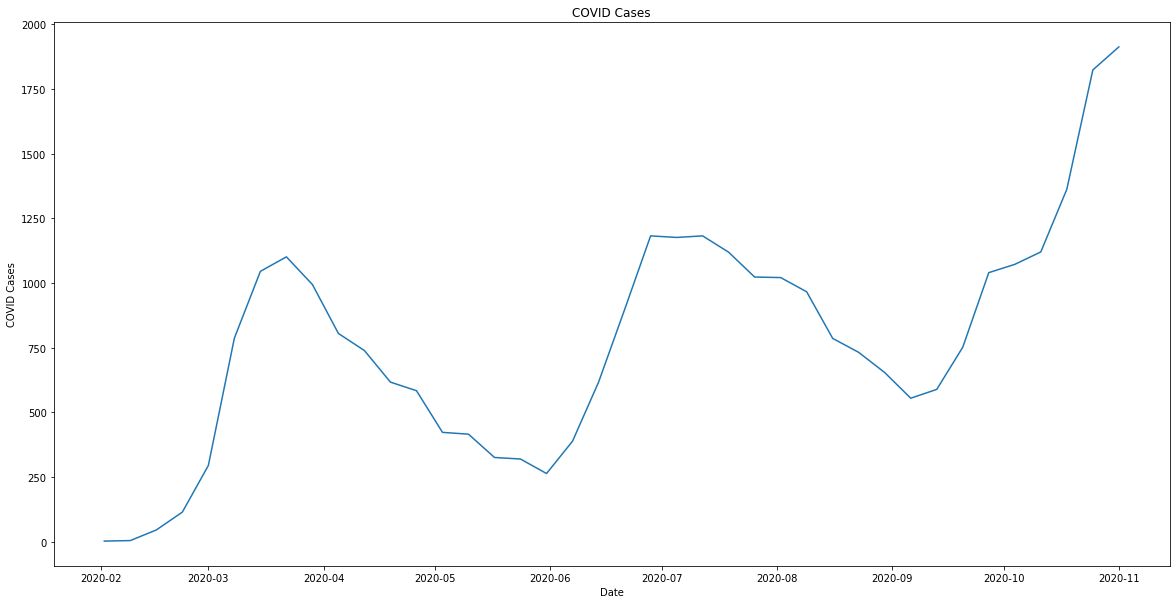

In [253]:
plt.figure(figsize=(20,10))

plt.plot(COVID_Dataset_King.groupby(['Week'])['NewPos_All'].sum())
plt.xlabel('Date')
plt.ylabel('COVID Cases')
plt.title('COVID Cases', fontdict=None, loc='center')
plt.savefig('Plots/Covid_cases.png')

In the above plot, we can identify the 3 waves of COVID that we heard in NEWS and social-media platforms. We observe 2 drops and we are currently facing the 3rd wave of COVID. The vaccine has been approved and we might observe a drop in the coming months.

<Figure size 1440x720 with 0 Axes>

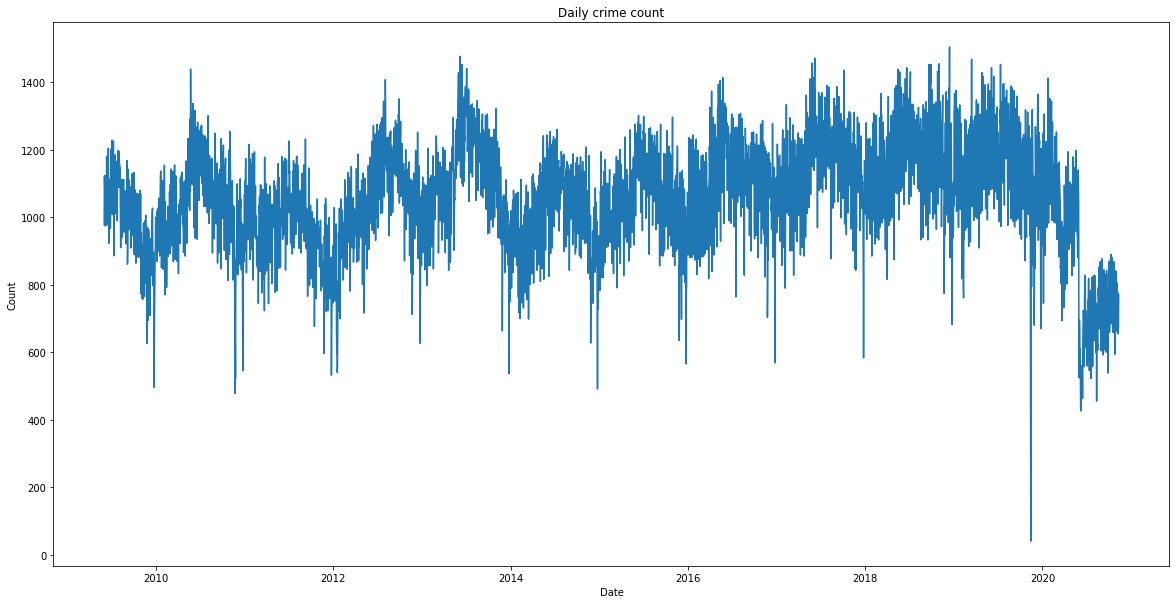

In [254]:
plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))

plt.plot(Crime_Dataset.groupby(['Date'])['Call Type'].count())
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily crime count', fontdict=None, loc='center')

plt.savefig('Plots/Daily_Crime_Count.png')

<Figure size 1440x720 with 0 Axes>

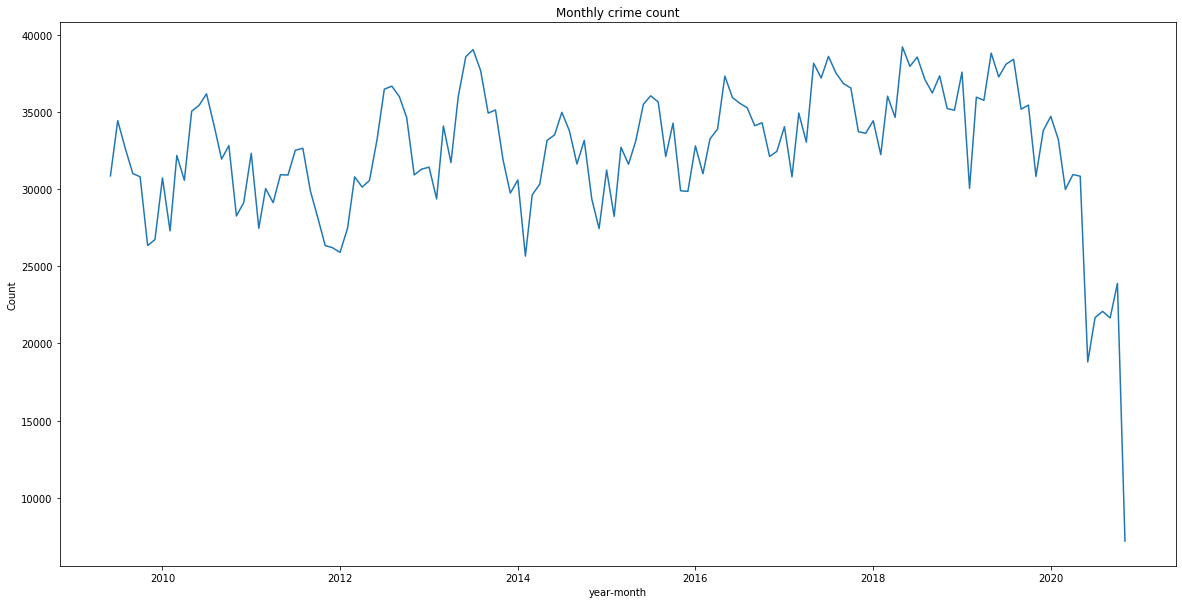

In [255]:
plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))

plt.plot(Crime_Dataset.groupby(['year-month'])['Call Type'].count())
plt.xlabel('year-month')
plt.ylabel('Count')
plt.title('Monthly crime count', fontdict=None, loc='center')

plt.savefig('Plots/Monthly_Crime_Count.png')

In the above plots, we can see the daily and monthly cases being reported during the years and observe a drop in 2020. Which we will be investigating.

<Figure size 1440x720 with 0 Axes>

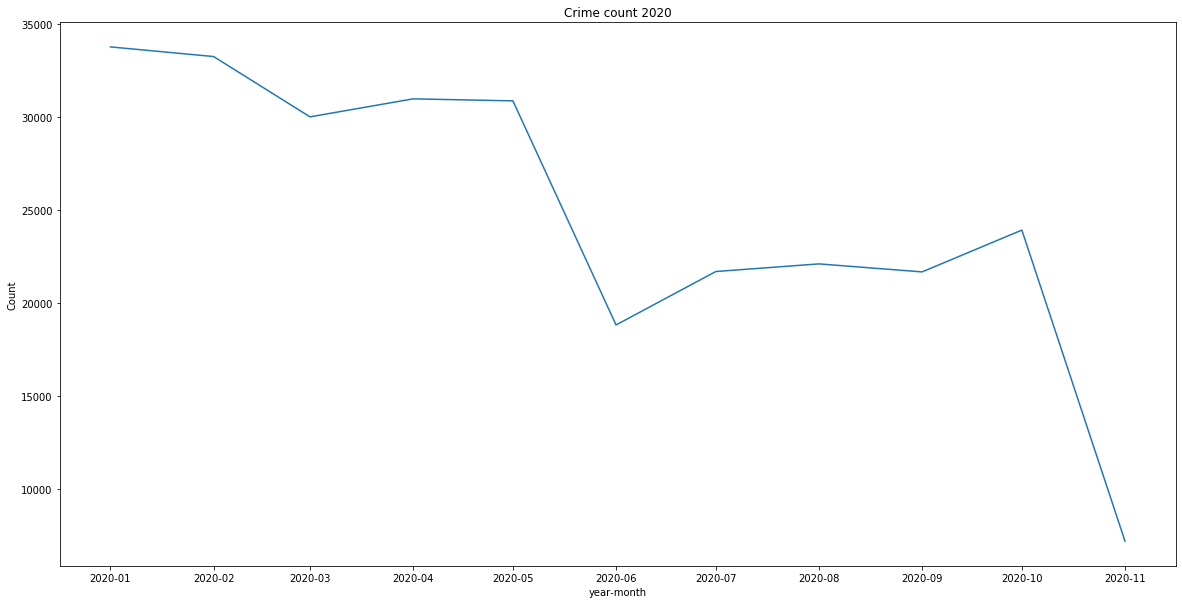

In [256]:
## Looking closer into 2020 dataset
plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))

plt.plot(Crime_Dataset_2020.groupby(['year-month'])['Call Type'].count())
plt.xlabel('year-month')
plt.ylabel('Count')
plt.title('Crime count 2020', fontdict=None, loc='center')

plt.savefig('Plots/Crime_Count_2020.png')

We observed a drop in June 2020. We also observe that the count started increasing in Oct 2020 i.e. the crime date dropped for 4 months in 2020. Looking at other NEWS reports there have been multiple reasons found for the drop - 
1. During June 2020 as more Seattle Police officers are moved onto streets, the crime stats show citywide dip
2. Some blogs stated that the Police stopped responding to 911 calls data which could have lead to a drop
3. As the awareness increased and lockdown was forced on people, there was a drop in crime.

We are not sure about the exact reason for the drop, but these are the 3 possible reasons that could have lead to the drop.

**Impact of COVID in Seattle crime count** 

Here, we are trying to solve the question 'Was there an impact of COVID on Seattle crime count? '



y=0.018301x+(-12391.313125)


<Figure size 1440x720 with 0 Axes>

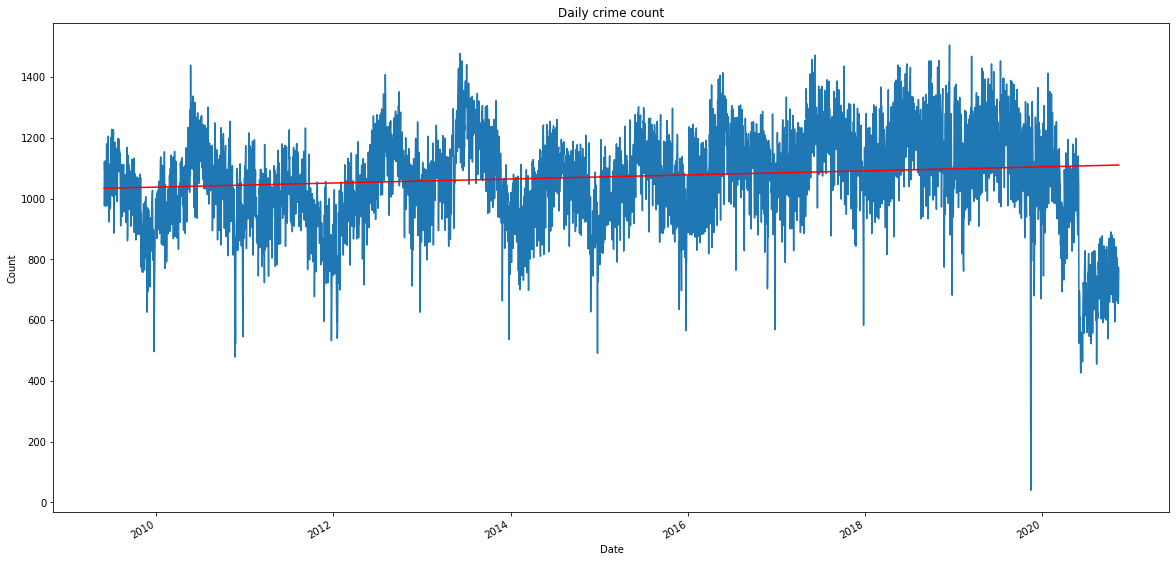

<Figure size 432x288 with 0 Axes>

In [257]:
## Adding a trendline
df =Crime_Dataset.groupby(['Date'], as_index=False)['Call Type'].count()
x_date =df['Date']
y = df['Call Type']

plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))
# Convert date to Matplotlib date numbers
x = mdates.date2num(x_date)

# plot the data itself
pylab.plot(x,y)

# calc the trendline (it is simply a linear fitting)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

polyX = numpy.linspace(x.min(), x.max(), 100)
pylab.plot(polyX,p(polyX),"r")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Show X-axis major tick marks as dates
loc= mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily crime count', fontdict=None, loc='center')
pylab.show()


plt.savefig('Plots/Daily_Crime_Count_Trendline.png')

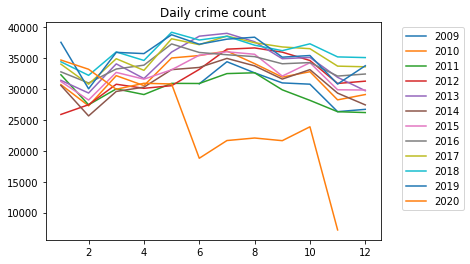

In [258]:
## year on year plot 
fig, ax = plt.subplots()

for i in range(2009,2021):
    temp = Crime_Dataset[Crime_Dataset.year==i]
    ax.plot(temp.groupby(['month'])['Call Type'].count(), label=i)


ax.set_title('Year-on-year plot')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig('Plots/Year-on-Year_Trend.png')
plt.show()

In [259]:
## Running T-test to check significance

from scipy import stats
data_2020 = Crime_Dataset_2020.groupby(['month'], as_index=False)['Call Type'].count()
Crime_Dataset_2019 = Crime_Dataset[Crime_Dataset.year==2019]
data_2019 = Crime_Dataset_2019.groupby(['month'], as_index=False)['Call Type'].count()

stats.ttest_ind(data_2020['Call Type'], data_2019['Call Type'], equal_var = False)

Ttest_indResult(statistic=-4.239612126287276, pvalue=0.0010807760104881781)

**Insights**

p-value <0.05 indicates that the crime data in 2020 and crime data in 2019 are not same i.e. there is a significant change in 2020 crime data compared to 2019

**Relationship between COVID cases and crime count** 

Relationship between the COVID cases being captured in Seattle to the crime cases in Seattle. 

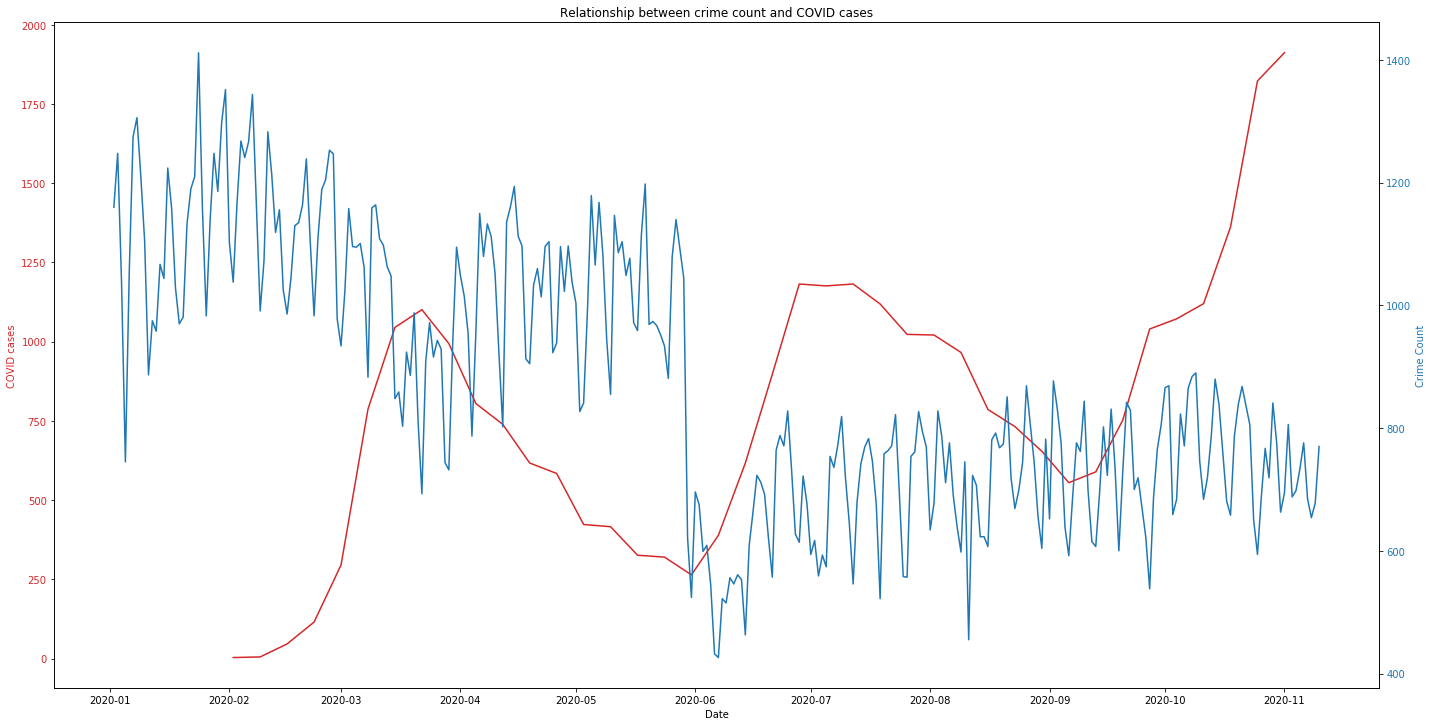

In [260]:
d1 = COVID_Dataset_King.groupby(['Week'])['NewPos_All'].sum()
d2 = Crime_Dataset_2020.groupby(['Date'])['Call Type'].count() 

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID cases', color=color)
ax1.plot(d1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Crime Count', color=color)  # we already handled the x-label with ax1
ax2.plot(d2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Relationship between crime count and COVID cases', fontdict=None, loc='center')



plt.savefig('Plots/Relationship_COVID_Crime.png')
plt.show()


In [261]:
d1 = Crime_Dataset_2020.groupby(['month'], as_index=False)['Call Type'].count()

In [262]:
d1 = d1[d1.month>2]

In [263]:
d1

,month,Call Type
2,3,29985
3,4,30953
4,5,30845
5,6,18800
6,7,21672
7,8,22082
8,9,21651
9,10,23899
10,11,7182


In [264]:
d2 = COVID_Dataset_King.groupby(['month'], as_index=False)['NewPos_All'].sum()

In [265]:
d2 = d2[d2.month>2]

In [266]:
from scipy.stats import pearsonr
corr, _ = pearsonr(d1['Call Type'],d2['NewPos_All'])
#cor(d1['Call Type'],d2['NewPos_All'])

In [267]:
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.173


**The correlation is 0.173 i.e. there is very little to no correlation between the COVID cases and crime count**

**Trend for different crimedata call types**

We expected to see an increase in crimes happening inside a household -  ranging from assault to murder.

1
Ttest_indResult(statistic=-5.004683740491168, pvalue=0.00023953824505355405)


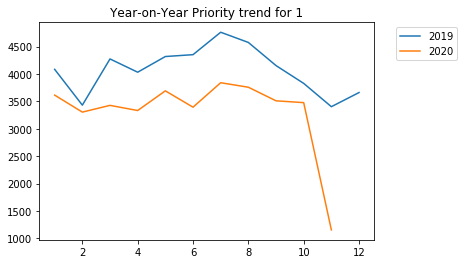

2
Ttest_indResult(statistic=-2.4723396553231343, pvalue=0.0236579072715555)


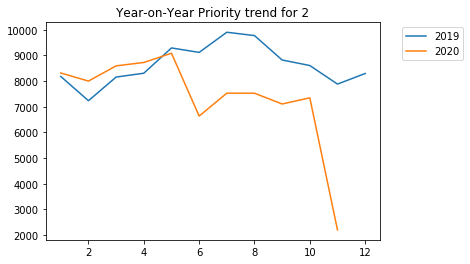

3
Ttest_indResult(statistic=-7.967776873044791, pvalue=2.0219456012973177e-06)


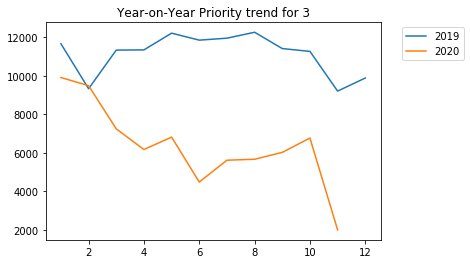

4
Ttest_indResult(statistic=-6.567536107967391, pvalue=4.882949756454543e-05)


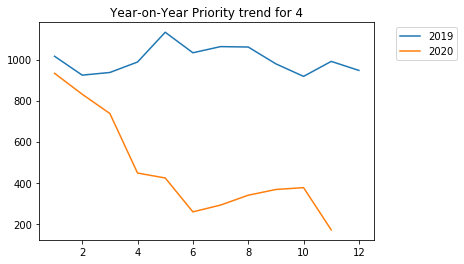

5
Ttest_indResult(statistic=4.986261788699415, pvalue=0.000542093011760193)


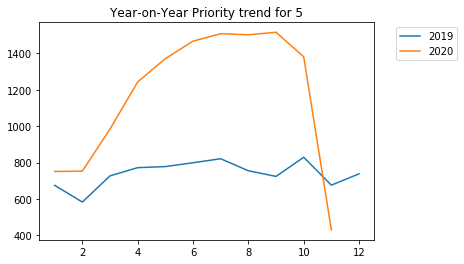

6
Ttest_indResult(statistic=-2.061692196387152, pvalue=0.08485747206341598)


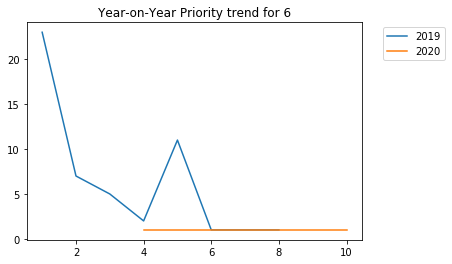

7
Ttest_indResult(statistic=-2.375443196970293, pvalue=0.0389854557976547)


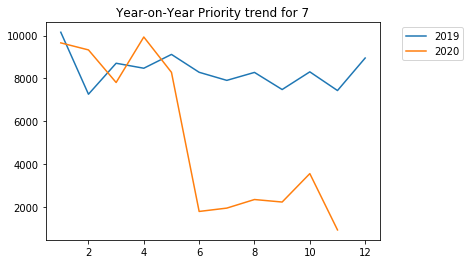

8
Ttest_indResult(statistic=nan, pvalue=nan)


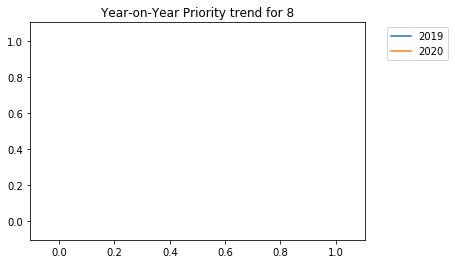

9
Ttest_indResult(statistic=-6.4013012220625605, pvalue=7.894807592839695e-06)


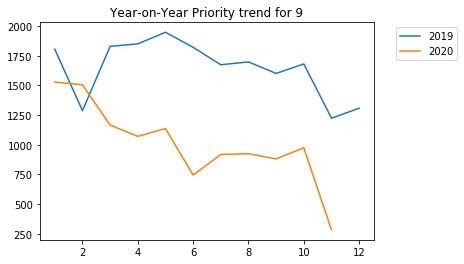

In [268]:
## Running T-test to check significance

from scipy import stats
for i in range(1,10):
    print(i)
    data_2020 = Crime_Dataset_2020[(Crime_Dataset_2020.Priority==i) & (Crime_Dataset_2020.month<11)]
    data_2020 = data_2020.groupby(['month'], as_index=False)['Call Type'].count()
    data_2019 = Crime_Dataset_2019[(Crime_Dataset_2019.Priority==i) & (Crime_Dataset_2019.month<11)]
    data_2019 = data_2019.groupby(['month'], as_index=False)['Call Type'].count()

    print(stats.ttest_ind(data_2020['Call Type'], data_2019['Call Type'], equal_var = False))
    plt.figure()
    temp_2019 = Crime_Dataset[(Crime_Dataset.year==2019) & (Crime_Dataset.Priority==i) ]
    temp_2020 = Crime_Dataset[(Crime_Dataset.year==2020) & (Crime_Dataset.Priority==i) ]
    plt.plot(temp_2019.groupby(['month'])['Call Type'].count(), label='2019')
    plt.plot(temp_2020.groupby(['month'])['Call Type'].count(), label='2020')
    plt.title('Year-on-Year Priority trend for '+ str(i))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.savefig('Plots/Priority'+str(i)+'.png')

    plt.show()
    

**Insights**

Looking at the 10 distinct priority group shared with us, we did t-test for each and saw that for 3 groups (1, 2, 5 )the p-value was less than <0.05 i.e. there was a significant change in the crime.
Looking further into these priority groups, we see that -

1. Priority Group 1 was lower than 2019 - Priority 1 contains mostly disturbance or crisis or suspicious person calls
2. Priority Group 2 was lower than 2019 - Priority 2 contains disturbance calls related to trespass
3. Priority Group 5 increased in 2020 - Priority 5 contains traffic, faud or burglary incidents

In [269]:
a = Crime_Dataset_2020[Crime_Dataset_2020.Priority == 5]
a['Final Call Type'].value_counts()

--TRAFFIC - MV COLLISION INVESTIGATION     2557
--THEFT - ALL OTHER                        1345
--FRAUD - FRAUD, INCLUDING BUNCO           1225
--BURGLARY - UNOCC STRUC ON RESN PROP       928
--THEFT - CAR PROWL                         863
                                           ... 
PROPERTY - FOUND GUN, SHELLCASINGS            1
PHONE - OBSCENE OR NUISANCE PHONE CALLS       1
ANIMAL, REPORT - BITE                         1
--NARCOTICS - OTHER                           1
--DISTURBANCE - JUVENILE                      1
Name: Final Call Type, Length: 101, dtype: int64

In [270]:
a = Crime_Dataset_2020[Crime_Dataset_2020.Priority == 1]
a['Final Call Type'].value_counts()

--DISTURBANCE - OTHER                        4867
--ASSIST OTHER AGENCY - CITY AGENCY          3720
--CRISIS COMPLAINT - GENERAL                 3016
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)      2860
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON     2522
                                             ... 
ASSIST SPD - URGENT SERVICE                     1
HARAS - NO BIAS, THREATS OR MALICIOUSNESS       1
-OUT AT RANGE                                   1
PARKING VIOLATION (EXCEPT ABANDONED CAR)        1
-ASSIGNED DUTY - DETAIL BY SUPERVISOR           1
Name: Final Call Type, Length: 234, dtype: int64

In [271]:
a = Crime_Dataset_2020[Crime_Dataset_2020.Priority == 2]
a['Final Call Type'].value_counts()

--DISTURBANCE - OTHER                         14289
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON      11077
--PROWLER - TRESPASS                           8851
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)        4939
--CRISIS COMPLAINT - GENERAL                   3495
                                              ...  
-GAS/MAINTENANCE/WASH/GARAGE                      1
FIREWORKS - NUISANCE (NO HAZARD)                  1
MVC - WITH INJURIES (INCLUDES HIT AND RUN)        1
ARSON - REPORT                                    1
--PERSON - TRUANCY                                1
Name: Final Call Type, Length: 250, dtype: int64

# Conclusion

Trends before and after COVID - There was a significant drop in cases when COVID started in Feb’20

Relationship between the COVID cases being captured in Seattle to the crime cases in Seattle. - We did not observe a significant relationship between the COVID cases being captured to the crime cases.

Trends before and after COVID for different crime data call types.
3/10 Priority Type has a significant change in crime post-COVID. As per our expectation, we saw a change in fraud, house crime and narcotics, but there wasn’t a significant drop in crimes like robbery 
